In [1]:
cd /g/data/jk72/deg581/apom/ana/notebooks

/g/data/jk72/deg581/apom/ana/notebooks


In [2]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
import matplotlib.ticker as mticker
## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import repackage
repackage.add('../../')
repackage.add('../')

'/jobfs/121995516.gadi-pbs'

In [3]:
# Suite for Analysis - Overview

# script needs to:
# load 1-5 variables from multiple files
# run some calculation and concatenate together
# make some plots

In [4]:


FilePath='/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/' # Truth file settings
prefix='roms_his_'
timeRange = [12, 13]
datelist = np.array(range(timeRange[0],timeRange[1],1))

def add_zeros_to_4(date):
    if date<10:
        to_add = '000'
    elif date>9 & date<100:
        to_add = '00'
    elif date>99 & date < 1000:
        to_add = '0'
    else: 
        to_add = ''
    return to_add

def generateFileList(FilePath,prefix,datelist):
    filelist=[FilePath+prefix+add_zeros_to_4(datelist[0])+str(datelist[0])+'.nc']
    for dates in datelist[1:]:
        filenameToAppend=FilePath+prefix+add_zeros_to_4(dates)+str(dates)+'.nc'
        filelist.append(filenameToAppend)
    return filelist

fl=generateFileList(FilePath,prefix,datelist)
print(fl)

# ds=loadOverlappedNetcdfFileList(filelist=fl,overlapDays=7)

ds = xr.open_mfdataset(fl,chunks = {'ocean_time':1}, data_vars='minimal', compat='override',coords='minimal',parallel='False',join='right')

print(ds.nbytes/1e9,'G')

['/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms_his_0012.nc']
255.264537416 G


In [5]:
ds = ds.drop_vars(['u','v','Tb','Sb','u_eastward','v_northward','rho','ubar_eastward','vbar_northward','w','shflux','ssflux','sustr','svstr'])
print(ds.nbytes/1e9,'G')
ds

63.169125416 G


<xarray.Dataset>
Dimensions:        (tracer: 2, boundary: 4, s_rho: 31, s_w: 32, eta_rho: 750,
                    xi_rho: 900, eta_u: 750, xi_u: 899, eta_v: 749, xi_v: 900,
                    eta_psi: 749, xi_psi: 899, ocean_time: 365)
Coordinates:
  * s_rho          (s_rho) float64 -0.9839 -0.9516 -0.9194 ... -0.04839 -0.01613
  * s_w            (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.06452 -0.03226 0.0
    x_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(750, 900), meta=np.ndarray>
    y_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(750, 900), meta=np.ndarray>
    x_u            (eta_u, xi_u) float64 dask.array<chunksize=(750, 899), meta=np.ndarray>
    y_u            (eta_u, xi_u) float64 dask.array<chunksize=(750, 899), meta=np.ndarray>
    x_v            (eta_v, xi_v) float64 dask.array<chunksize=(749, 900), meta=np.ndarray>
    y_v            (eta_v, xi_v) float64 dask.array<chunksize=(749, 900), meta=np.ndarray>
    x_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(749, 899), meta=np.ndarray>
    y_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(749, 899), meta=np.ndarray>
  * ocean_time     (ocean_time) datetime64[ns] 2017-12-30 ... 2018-12-29
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/74)
    ntimes         int32 ...
    ndtfast        int32 ...
    dt             float64 ...
    dtfast         float64 ...
    dstart         datetime64[ns] ...
    nHIS           int32 ...
    ...             ...
    mask_v         (eta_v, xi_v) float64 dask.array<chunksize=(749, 900), meta=np.ndarray>
    mask_psi       (eta_psi, xi_psi) float64 dask.array<chunksize=(749, 899), meta=np.ndarray>
    m              (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 750, 900), meta=np.ndarray>
    zeta           (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 750, 900), meta=np.ndarray>
    temp           (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 31, 750, 900), meta=np.ndarray>
    salt           (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 31, 750, 900), meta=np.ndarray>
Attributes: (12/34)
    file:              roms_his_0012.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Amery Ice Shelf-ocean Application
    var_info:          ROMS/External/varinfo.yaml
    ...                ...
    compiler_command:  /apps/openmpi/4.0.2/bin/mpif90
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           ROMS/TOMS, Version 4.1, Saturday - March 23, 2024 -  4...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       AMERY, ANA_BSFLUX, ANA_BTFLUX, ANA_INITIAL, ANA_SRFLUX...

In [6]:
# make masks
ds['mask_zice'] = ((ds.zice<0)*ds.mask_rho)

# # now make a ROI mask(s)
# plt.figure(figsize=(15,15))
# ds.mask_zice.plot(x='x_rho',y='y_rho')
# plt.grid()
poly_shelf = np.array([
    [1.55e6,600000],
    [2.25e6,600000],
    [2.25e6,800000],
    [2.20e6,830000],
    [1.55e6,890000]])
# plt.plot(poly_shelf[:,0],poly_shelf[:,1])
# plt.show()

def inpolygon(xq, yq, xv, yv):
    from matplotlib import path
    shape = xq.shape
    xq = xq.reshape(-1)
    yq = yq.reshape(-1)
    xv = xv.reshape(-1)
    yv = yv.reshape(-1)
    q = [(xq[i], yq[i]) for i in range(xq.shape[0])]
    p = path.Path([(xv[i], yv[i]) for i in range(xv.shape[0])])
    return p.contains_points(q).reshape(shape)


mask_roi = inpolygon(ds.x_rho.values, ds.y_rho.values,poly_shelf[:,0], poly_shelf[:,1])


ds['mask_zice_roi'] = ds.mask_zice*mask_roi
# ds.mask_zice_roi.plot()
roi_label1 = 'amery'
ds.mask_zice_roi.attrs['long_name']=roi_label1

# make open ocean mask

ds['mask_openocean'] = ds.mask_rho*(ds.mask_zice==0)
ds['mask_openoceanNaN'] = ds.mask_openocean.where(ds.mask_openocean)

ds['mask_rhoNaN'] = ds.mask_rho.where(ds.mask_rho)

ds['mask_ziceNaN'] = ds.mask_zice.where(ds.mask_zice)


In [7]:
# set any grid data here.


weights_area = (1/ds.pm)*(1/ds.pn)
weights_area.name = "weights"

print('making vertical coordinates')
Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho = (ds.zice) + ((ds.zice) + ds.h) * Zo_rho
Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
z_w = Zo_w * ((ds.zice) + ds.h) + (ds.zice)
    
ds.coords['z_w0'] = z_w.where(ds.mask_rho, 0).transpose('s_w', 'eta_rho', 'xi_rho')
ds.coords['z_rho0'] = z_rho.where(ds.mask_rho, 0).transpose('s_rho', 'eta_rho', 'xi_rho')



making vertical coordinates


In [8]:
# make monthly and seasonal weights etc
# first monthyl

# calculate the month length for each value
month_length = ds.ocean_time.dt.days_in_month


## Calculate the weights by grouping by 'time.season'.
weights_sea = (
    month_length.groupby("ocean_time.season") / month_length.groupby("ocean_time.season").sum()
)

## Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights_sea.groupby("ocean_time.season").sum().values, np.ones(4))

# ## Calculate the weighted average
# ds_temp_weighted = (ds.temp * weights).groupby("ocean_time.season").sum(dim="ocean_time")
# ds_salt_weighted = (ds.salt * weights).groupby("ocean_time.season").sum(dim="ocean_time")
# ds_u_weighted = (ds.u_eastward * weights).groupby("ocean_time.season").sum(dim="ocean_time")
# ds_v_weighted = (ds.v_northward * weights).groupby("ocean_time.season").sum(dim="ocean_time")

# now make a daily climatology

ds_dailyclima = ds.groupby('ocean_time.dayofyear').mean()


# melt rates

In [9]:
# implement the missing value
ds['m'] = ds.m.where(ds.m<1e35,np.NaN)
ds['my'] = ds.m*(60*60*24*365)

ds_dailyclima['m'] = ds_dailyclima.m.where(ds_dailyclima.m<1e35,np.NaN)
ds_dailyclima['my'] = ds_dailyclima.m*(60*60*24*365)

In [10]:
ds.ocean_time.isel(ocean_time=slice(270,330)).mean(dim='ocean_time')

<xarray.DataArray 'ocean_time' ()>
array('2018-10-25T12:00:00.000000000', dtype='datetime64[ns]')

Text(2290000.0, 880000.0, '5')

<Figure size 640x480 with 0 Axes>

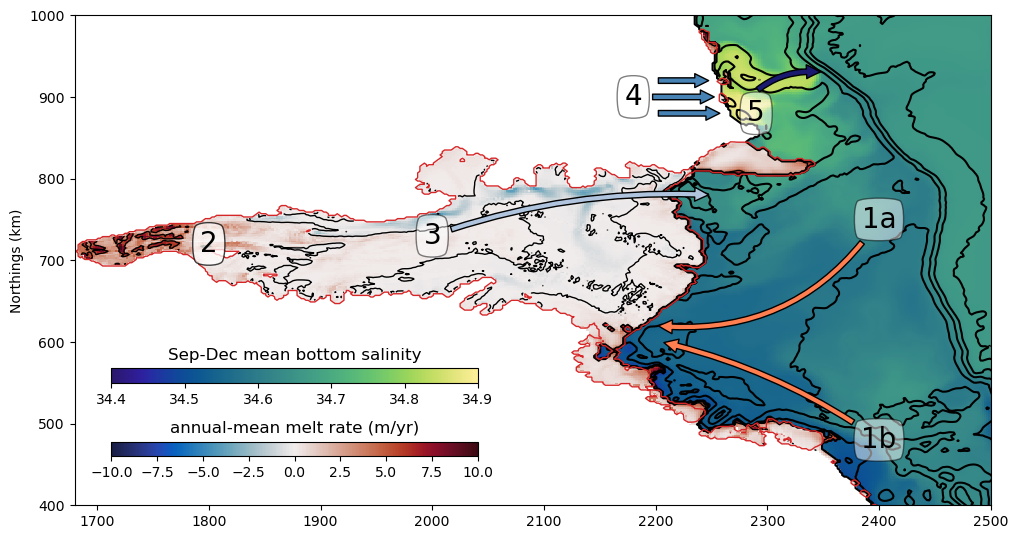

In [11]:
# gs = gridspec.GridSpec(nrows=2,ncols=2,wspace=0.2, hspace=0.2)
# plt.cla()
# plt.clf()
# fig = plt.figure(figsize=[26,14])
# ax = None

# ax=fig.add_subplot(gs[0,0])
# im1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.balance',vmin=-10,vmax=10,add_colorbar=False)
# # (ds.mask_rho*(ds.mask_zice==0)*sigma_0_55_67).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.dense',vmin=27.7,vmax=28.1)
# im2 = (ds.mask_rho*(ds.mask_openoceanNaN)*ds.salt.isel(s_rho=0).isel(ocean_time=slice(270,330)).mean(dim='ocean_time')).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.haline',vmin=34.4,vmax=34.9,add_colorbar=False)

# co1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(np.arange(-10,10,5)),colors='k',linewidths=1)
# co2 = (ds.h*ds.mask_rho*(ds.mask_zice==0)).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(0,250,500,750,1000,2000,3000),colors='k')
# co3 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C3',linestyles='-',linewidths=1)

# # ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
# ax.set_xlim((1.68e6,2.5e6))
# ax.set_ylim((.4e6,1.0e6))
# ax.set_ylabel('Northings (km)')
# ax.set_xlabel('')
# # ax.grid()
# scale_ticks = 1e3
# ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
# ax.xaxis.set_major_formatter(ticks_x)
# ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
# ax.yaxis.set_major_formatter(ticks_y)
# # ax.set_xticklabels([])
# ax.set_title('')


# cax = inset_axes(ax,
#                 width="40%",  # width = 10% of parent_bbox width
#                 height="3%",  # height : 50%
#                 loc='lower left',
#                 bbox_to_anchor=(.04,.1, 1, 1),
#                 bbox_transform=ax.transAxes,
#                 borderpad=0,
#                 )
# cbar = fig.colorbar(im1, cax=cax, orientation='horizontal') 
# cax.set_title(r'annual-mean melt rate (m/yr)')



# cax = inset_axes(ax,
#                 width="40%",  # width = 10% of parent_bbox width
#                 height="3%",  # height : 50%
#                 loc='lower left',
#                 bbox_to_anchor=(.04,.25, 1, 1),
#                 bbox_transform=ax.transAxes,
#                 borderpad=0,
#                 )
# cbar = fig.colorbar(im2, cax=cax, orientation='horizontal') 
# cax.set_title(r'Sep-Dec mean bottom salinity')


# # annotations


# ax.annotate("1a",
#             xy=(2.2e6, 620e3), xycoords='data',
#             xytext=(2.4e6,750e3), textcoords='data',
#             size=20, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=-0.3",
#                            facecolor="coral"))


# ax.annotate("1b",
#             xy=(2.205e6, 600e3), xycoords='data',
#             xytext=(2.4e6, 480e3), textcoords='data',
#             size=20, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=0.1",
#                            facecolor="coral"))


# ax.annotate("2",
#             xy=(1.80e6, 720e3), xycoords='data',
#             xytext=(1.80e6, 720e3), textcoords='data',
#             size=20, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.75))



# ax.annotate("3",
#             xy=(2.25e6, 780e3), xycoords='data',
#             xytext=(2.0e6, 730e3), textcoords='data',
#             size=20, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=-0.1",
#                            facecolor="lightsteelblue"))



# ax.annotate("4",
#             xy=(2.255e6, 900e3), xycoords='data',
#             xytext=(2.18e6, 900e3), textcoords='data',
#             size=20, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             # connectionstyle="arc3,rad=-0.1",
#                            facecolor="steelblue"))
# ax.annotate("",
#             xy=(2.25e6, 920e3), xycoords='data',
#             xytext=(2.2e6, 920e3), textcoords='data',
#             size=20, va="center", ha="center",
#             arrowprops=dict(arrowstyle="simple",
#                             # connectionstyle="arc3,rad=-0.1",
#                            facecolor="steelblue"))

# ax.annotate("",
#             xy=(2.26e6, 880e3), xycoords='data',
#             xytext=(2.2e6, 880e3), textcoords='data',
#             size=20, va="center", ha="center",
#             arrowprops=dict(arrowstyle="simple",
#                             # connectionstyle="arc3,rad=-0.1",
#                            facecolor="steelblue"))




# ax.annotate("5",
#             xy=(2.35e6, 930e3), xycoords='data',
#             xytext=(2.29e6, 880e3), textcoords='data',
#             size=20, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=-0.25",
#                             relpos=(0,1),
#                            facecolor="midnightblue"))

In [12]:
# dpi = 500
# image_save_dpi = 1500

# plt.rcParams['figure.dpi'] = image_save_dpi

# gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
# plt.cla()
# plt.clf()
# fig = plt.figure(figsize=[23,17])
# ax = None

# ax=fig.add_subplot(gs[0,0])
# im1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.balance',vmin=-10,vmax=10,add_colorbar=False)
# # (ds.mask_rho*(ds.mask_zice==0)*sigma_0_55_67).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.dense',vmin=27.7,vmax=28.1)
# im2 = (ds.mask_rho*(ds.mask_openoceanNaN)*ds.salt.isel(s_rho=0).isel(ocean_time=slice(270,330)).mean(dim='ocean_time')).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.haline',vmin=34.4,vmax=34.9,add_colorbar=False)

# co1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(np.arange(-10,10,5)),colors='k',linewidths=1)
# co2 = (ds.h*ds.mask_rho*(ds.mask_zice==0)).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(0,250,500,750,1000,2000,3000),colors='k')
# co3 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C3',linestyles='-',linewidths=1)

# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# # ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
# ax.set_xlim((1.68e6,2.5e6))
# ax.set_ylim((.4e6,1.0e6))
# ax.set_ylabel('Northings (km)',fontsize=20)
# ax.set_xlabel('Eastings (km)',fontsize=20)
# ax.set_xlabel('')
# # ax.grid()
# scale_ticks = 1e3
# ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
# ax.xaxis.set_major_formatter(ticks_x)
# ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
# ax.yaxis.set_major_formatter(ticks_y)
# # ax.set_xticklabels([])
# ax.set_title('')


# cax = inset_axes(ax,
#                 width="40%",  # width = 10% of parent_bbox width
#                 height="3%",  # height : 50%
#                 loc='lower left',
#                 bbox_to_anchor=(.04,.1, 1, 1),
#                 bbox_transform=ax.transAxes,
#                 borderpad=0,
#                 )
# cbar = fig.colorbar(im1, cax=cax, orientation='horizontal',) 
# cax.set_title(r'annual-mean melt rate (m/yr)',fontsize=20)



# cax = inset_axes(ax,
#                 width="40%",  # width = 10% of parent_bbox width
#                 height="3%",  # height : 50%
#                 loc='lower left',
#                 bbox_to_anchor=(.04,.25, 1, 1),
#                 bbox_transform=ax.transAxes,
#                 borderpad=0,
#                 )
# cbar = fig.colorbar(im2, cax=cax, orientation='horizontal') 
# cax.set_title(r'Sep-Dec mean bottom salinity',fontsize=20)


# # annotations


# ax.annotate("1a",
#             xy=(2.2e6, 620e3), xycoords='data',
#             xytext=(2.4e6,750e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=-0.3",
#                            facecolor="coral"))


# ax.annotate("1b",
#             xy=(2.205e6, 600e3), xycoords='data',
#             xytext=(2.4e6, 480e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=0.1",
#                            facecolor="coral"))


# ax.annotate("2",
#             xy=(1.80e6, 720e3), xycoords='data',
#             xytext=(1.80e6, 720e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.75))



# ax.annotate("3",
#             xy=(2.25e6, 780e3), xycoords='data',
#             xytext=(2.0e6, 730e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=-0.1",
#                            facecolor="lightsteelblue"))



# ax.annotate("4",
#             xy=(2.255e6, 900e3), xycoords='data',
#             xytext=(2.18e6, 900e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             # connectionstyle="arc3,rad=-0.1",
#                            facecolor="steelblue"))
# ax.annotate("",
#             xy=(2.25e6, 920e3), xycoords='data',
#             xytext=(2.2e6, 920e3), textcoords='data',
#             size=40, va="center", ha="center",
#             arrowprops=dict(arrowstyle="simple",
#                             # connectionstyle="arc3,rad=-0.1",
#                            facecolor="steelblue"))

# ax.annotate("",
#             xy=(2.26e6, 880e3), xycoords='data',
#             xytext=(2.2e6, 880e3), textcoords='data',
#             size=40, va="center", ha="center",
#             arrowprops=dict(arrowstyle="simple",
#                             # connectionstyle="arc3,rad=-0.1",
#                            facecolor="steelblue"))




# ax.annotate("5",
#             xy=(2.35e6, 930e3), xycoords='data',
#             xytext=(2.29e6, 880e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=-0.25",
#                             relpos=(0,1),
#                            facecolor="midnightblue"))

In [13]:
# # calculate the potential density anomaly ref to 0

# import seawater as sw

# sigma_0_5_18 = sw.pden(ds.salt.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').values,sw.temp(ds.salt.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').values,ds.temp.isel(s_rho=0).isel(ocean_time=slice(5,18)).mean(dim='ocean_time').values,ds.z_rho0.isel(s_rho=0).values),ds.z_rho0.isel(s_rho=0).values,0)-1000

# sigma_0_55_67 = sw.pden(ds.salt.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').values,sw.temp(ds.salt.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').values,ds.temp.isel(s_rho=0).isel(ocean_time=slice(55,67)).mean(dim='ocean_time').values,ds.z_rho0.isel(s_rho=0).values),ds.z_rho0.isel(s_rho=0).values,0)-1000



In [14]:
import rioxarray

lima_full = rioxarray.open_rasterio('../data/raw/lima/00000-20080319-092059124.tif')

lima_full

<xarray.DataArray (band: 3, y: 19404, x: 22841)>
[1329620292 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 -2.668e+06 -2.668e+06 ... 2.813e+06 2.814e+06
  * y            (y) float64 2.362e+06 2.362e+06 ... -2.294e+06 -2.295e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point
    LAYER_TYPE:     athematic
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('RedBand', 'GreenBand', 'BlueBand')

In [15]:
lima = lima_full.where((lima_full.x>1.4e6)&(lima_full.x<3e6)&(lima_full.y>.1e6)&(lima_full.y<1.5e6),drop=True)


In [16]:
lima

<xarray.DataArray (band: 3, y: 5833, x: 5891)>
array([[[209., 208., 206., ...,   0.,   0.,   0.],
        [206., 206., 206., ...,   0.,   0.,   0.],
        [206., 206., 204., ...,   0.,   0.,   0.],
        ...,
        [209., 209., 214., ...,   0.,   0.,   0.],
        [211., 211., 212., ...,   0.,   0.,   0.],
        [211., 212., 213., ...,   0.,   0.,   0.]],

       [[209., 208., 208., ...,   0.,   0.,   0.],
        [206., 206., 208., ...,   0.,   0.,   0.],
        [206., 206., 206., ...,   0.,   0.,   0.],
        ...,
        [209., 209., 211., ...,   0.,   0.,   0.],
        [211., 211., 210., ...,   0.,   0.,   0.],
        [211., 212., 211., ...,   0.,   0.,   0.]],

       [[233., 232., 231., ...,   0.,   0.,   0.],
        [230., 230., 231., ...,   0.,   0.,   0.],
        [230., 230., 229., ...,   0.,   0.,   0.],
        ...,
        [233., 233., 240., ...,   0.,   0.,   0.],
        [235., 235., 234., ...,   0.,   0.,   0.],
        [235., 236., 235., ...,   0.,   0.,   0.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 1.4e+06 1.4e+06 1.401e+06 ... 2.813e+06 2.814e+06
  * y            (y) float64 1.5e+06 1.5e+06 1.499e+06 ... 1.005e+05 1.002e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point
    LAYER_TYPE:     athematic
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('RedBand', 'GreenBand', 'BlueBand')

In [17]:
# dpi = 500
# image_save_dpi = 1500

# plt.rcParams['figure.dpi'] = image_save_dpi

# gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
# plt.cla()
# plt.clf()
# fig = plt.figure(figsize=[23,17])
# ax = None

# ax=fig.add_subplot(gs[0,0])
# (lima.astype('uint8')).plot.imshow()
# im1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.balance',vmin=-10,vmax=10,add_colorbar=False)
# # (ds.mask_rho*(ds.mask_zice==0)*sigma_0_55_67).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.dense',vmin=27.7,vmax=28.1)
# im2 = (ds.mask_rho*(ds.mask_openoceanNaN)*ds.salt.isel(s_rho=0).isel(ocean_time=slice(270,330)).mean(dim='ocean_time')).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.haline',vmin=34.4,vmax=34.9,add_colorbar=False)

# co1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(np.arange(-10,10,5)),colors='k',linewidths=1)
# co2 = (ds.h*ds.mask_rho*(ds.mask_zice==0)).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(0,250,500,750,1000,2000,3000),colors='k')
# co3 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C3',linestyles='-',linewidths=1)

# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# # ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
# ax.set_xlim((1.68e6,2.5e6))
# ax.set_ylim((.4e6,1.0e6))
# ax.set_ylabel('Northings (km)',fontsize=20)
# ax.set_xlabel('Eastings (km)',fontsize=20)
# ax.set_xlabel('')
# # ax.grid()
# scale_ticks = 1e3
# ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
# ax.xaxis.set_major_formatter(ticks_x)
# ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
# ax.yaxis.set_major_formatter(ticks_y)
# # ax.set_xticklabels([])
# ax.set_title('')


# cax = inset_axes(ax,
#                 width="40%",  # width = 10% of parent_bbox width
#                 height="3%",  # height : 50%
#                 loc='lower left',
#                 bbox_to_anchor=(.04,.1, 1, 1),
#                 bbox_transform=ax.transAxes,
#                 borderpad=0,
#                 )
# cbar = fig.colorbar(im1, cax=cax, orientation='horizontal',) 
# cax.set_title(r'annual-mean melt rate (m/yr)',fontsize=20)



# cax = inset_axes(ax,
#                 width="40%",  # width = 10% of parent_bbox width
#                 height="3%",  # height : 50%
#                 loc='lower left',
#                 bbox_to_anchor=(.04,.25, 1, 1),
#                 bbox_transform=ax.transAxes,
#                 borderpad=0,
#                 )
# cbar = fig.colorbar(im2, cax=cax, orientation='horizontal') 
# cax.set_title(r'Sep-Dec mean bottom salinity',fontsize=20)


# # annotations


# ax.annotate("1a",
#             xy=(2.2e6, 620e3), xycoords='data',
#             xytext=(2.4e6,750e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=-0.3",
#                            facecolor="coral"))


# ax.annotate("1b",
#             xy=(2.205e6, 600e3), xycoords='data',
#             xytext=(2.4e6, 480e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=0.1",
#                            facecolor="coral"))


# ax.annotate("2",
#             xy=(1.80e6, 720e3), xycoords='data',
#             xytext=(1.80e6, 720e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.75))



# ax.annotate("3",
#             xy=(2.25e6, 780e3), xycoords='data',
#             xytext=(2.0e6, 730e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=-0.1",
#                            facecolor="lightsteelblue"))



# ax.annotate("4",
#             xy=(2.255e6, 900e3), xycoords='data',
#             xytext=(2.18e6, 900e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             # connectionstyle="arc3,rad=-0.1",
#                            facecolor="steelblue"))
# ax.annotate("",
#             xy=(2.25e6, 920e3), xycoords='data',
#             xytext=(2.2e6, 920e3), textcoords='data',
#             size=40, va="center", ha="center",
#             arrowprops=dict(arrowstyle="simple",
#                             # connectionstyle="arc3,rad=-0.1",
#                            facecolor="steelblue"))

# ax.annotate("",
#             xy=(2.26e6, 880e3), xycoords='data',
#             xytext=(2.2e6, 880e3), textcoords='data',
#             size=40, va="center", ha="center",
#             arrowprops=dict(arrowstyle="simple",
#                             # connectionstyle="arc3,rad=-0.1",
#                            facecolor="steelblue"))




# ax.annotate("5",
#             xy=(2.35e6, 930e3), xycoords='data',
#             xytext=(2.29e6, 880e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=-0.25",
#                             relpos=(0,1),
#                            facecolor="midnightblue"))

Text(0.5, 1.0, 'bathymetry (m)')

<Figure size 640x480 with 0 Axes>

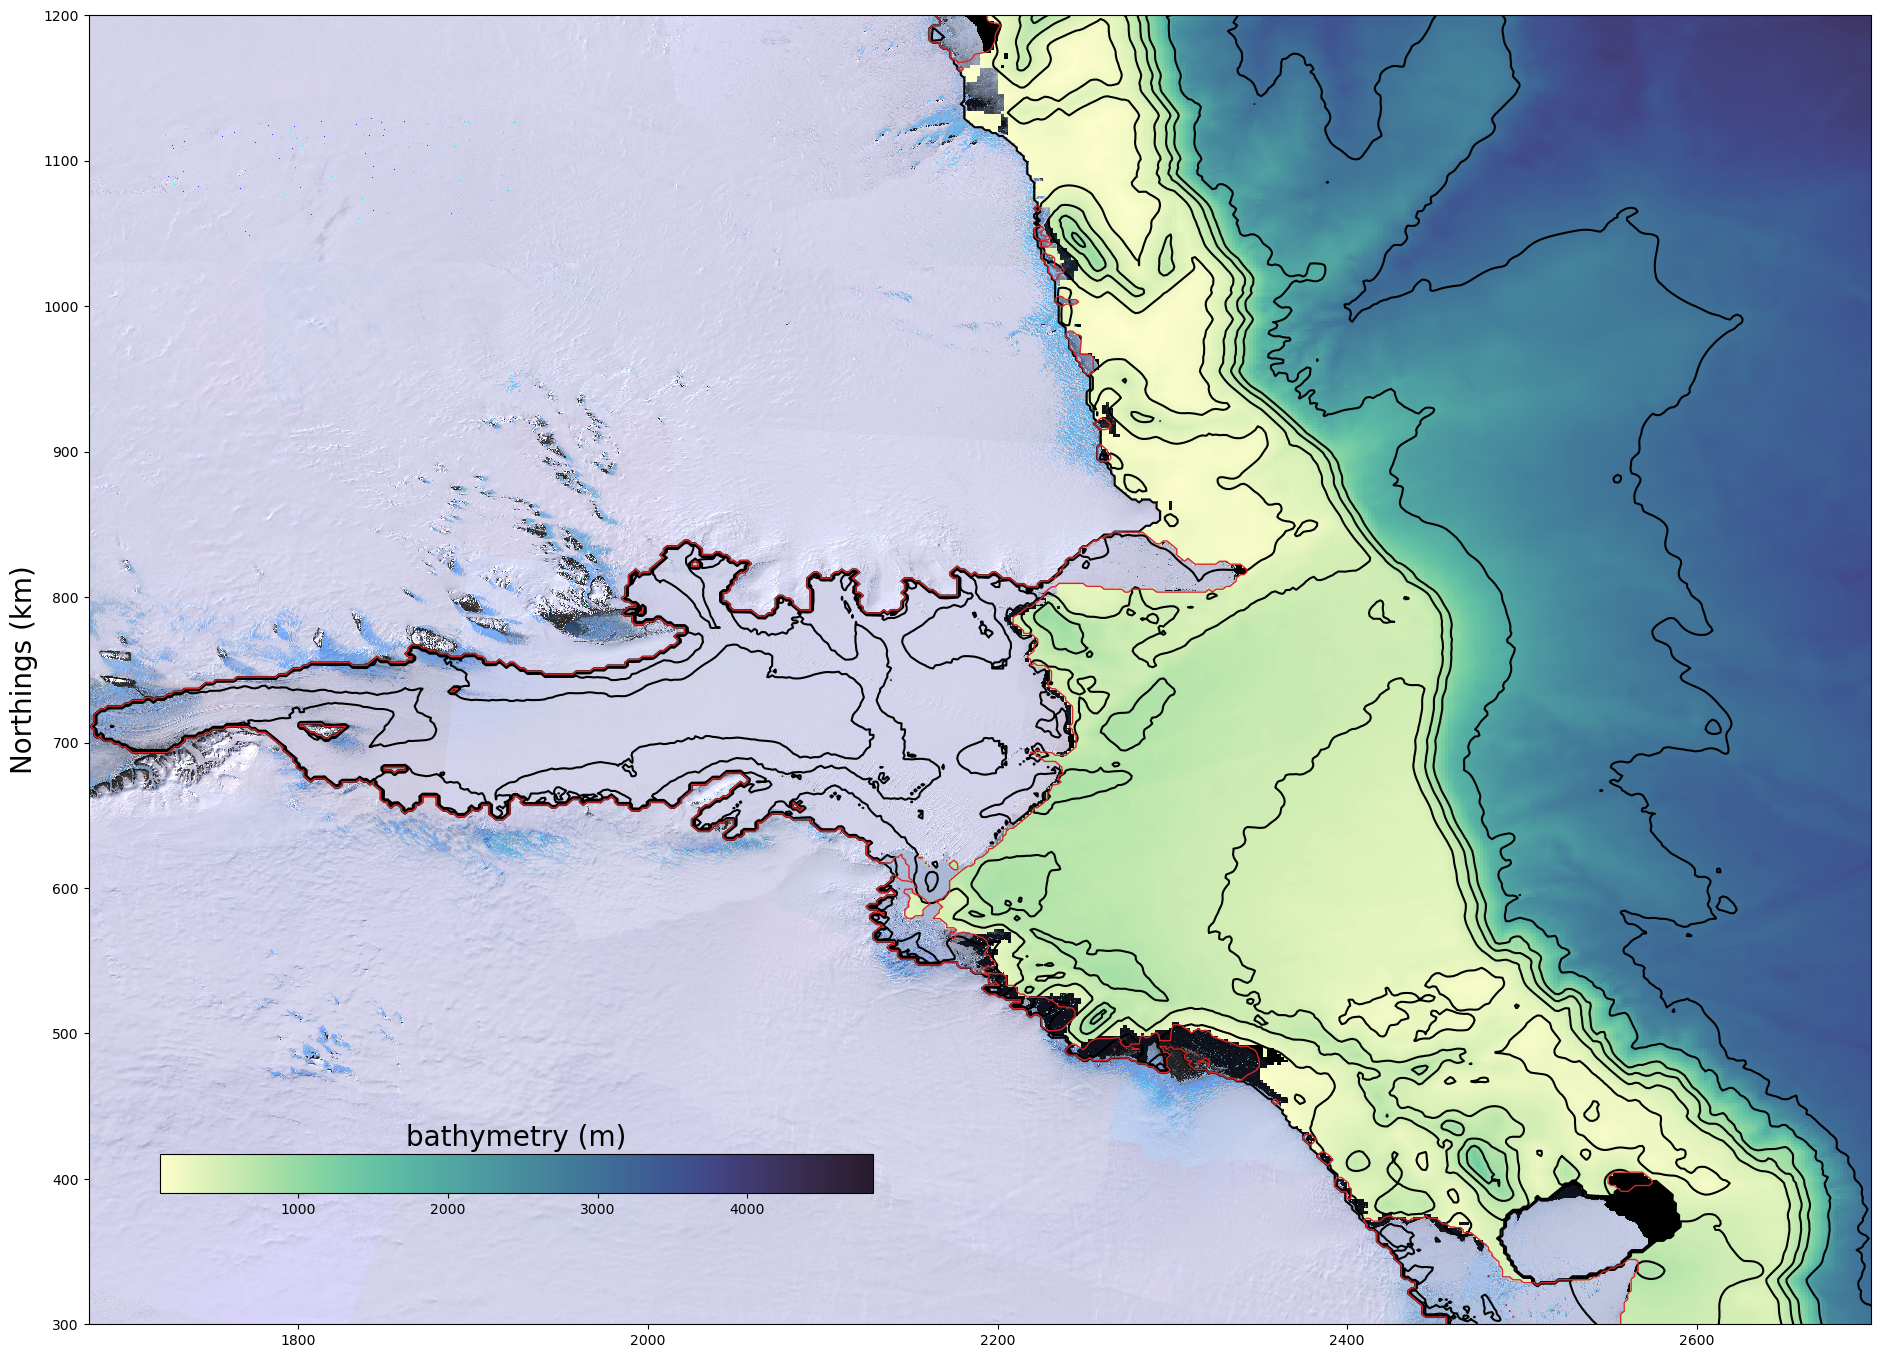

In [18]:
# dpi = 500
# image_save_dpi = 1500

# plt.rcParams['figure.dpi'] = dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[23,17])
ax = None

ax=fig.add_subplot(gs[0,0])
(lima.astype('uint8')).plot.imshow()
# im1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.balance',vmin=-10,vmax=10,add_colorbar=False)
# (ds.mask_rho*(ds.mask_zice==0)*sigma_0_55_67).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.dense',vmin=27.7,vmax=28.1)
# im2 = (ds.mask_rho*(ds.mask_openoceanNaN)*ds.salt.isel(s_rho=0).isel(ocean_time=slice(270,330)).mean(dim='ocean_time')).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.haline',vmin=34.4,vmax=34.9,add_colorbar=False)
im1 = (ds.mask_rho*(ds.mask_openoceanNaN)*ds.h).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.deep',add_colorbar=False)
# co1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(np.arange(-10,10,5)),colors='k',linewidths=1)
# co2 = (ds.h*ds.mask_rho*(ds.mask_zice==0)).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(0,250,500,750,1000,2000,3000),colors='k')
co2 = (ds.h*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(0,250,500,750,1000,2000,3000),colors='k')
co3 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C3',linestyles='-',linewidths=1)

# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((1.68e6,2.7e6))
ax.set_ylim((.3e6,1.2e6))
ax.set_ylabel('Northings (km)',fontsize=20)
ax.set_xlabel('Eastings (km)',fontsize=20)
ax.set_xlabel('')
# ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
# ax.set_xticklabels([])
ax.set_title('')


cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.1, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal',) 
cax.set_title(r'bathymetry (m)',fontsize=20)



# cax = inset_axes(ax,
#                 width="40%",  # width = 10% of parent_bbox width
#                 height="3%",  # height : 50%
#                 loc='lower left',
#                 bbox_to_anchor=(.04,.25, 1, 1),
#                 bbox_transform=ax.transAxes,
#                 borderpad=0,
#                 )
# cbar = fig.colorbar(im2, cax=cax, orientation='horizontal') 
# cax.set_title(r'Sep-Dec mean bottom salinity',fontsize=20)


# annotations


# ax.annotate("1a",
#             xy=(2.2e6, 620e3), xycoords='data',
#             xytext=(2.4e6,750e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=-0.3",
#                            facecolor="coral"))


# ax.annotate("1b",
#             xy=(2.205e6, 600e3), xycoords='data',
#             xytext=(2.4e6, 480e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=0.1",
#                            facecolor="coral"))


# ax.annotate("2",
#             xy=(1.80e6, 720e3), xycoords='data',
#             xytext=(1.80e6, 720e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.75))



# ax.annotate("3",
#             xy=(2.25e6, 780e3), xycoords='data',
#             xytext=(2.0e6, 730e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=-0.1",
#                            facecolor="lightsteelblue"))



# ax.annotate("4",
#             xy=(2.255e6, 900e3), xycoords='data',
#             xytext=(2.18e6, 900e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             # connectionstyle="arc3,rad=-0.1",
#                            facecolor="steelblue"))
# ax.annotate("",
#             xy=(2.25e6, 920e3), xycoords='data',
#             xytext=(2.2e6, 920e3), textcoords='data',
#             size=40, va="center", ha="center",
#             arrowprops=dict(arrowstyle="simple",
#                             # connectionstyle="arc3,rad=-0.1",
#                            facecolor="steelblue"))

# ax.annotate("",
#             xy=(2.26e6, 880e3), xycoords='data',
#             xytext=(2.2e6, 880e3), textcoords='data',
#             size=40, va="center", ha="center",
#             arrowprops=dict(arrowstyle="simple",
#                             # connectionstyle="arc3,rad=-0.1",
#                            facecolor="steelblue"))




# ax.annotate("5",
#             xy=(2.35e6, 930e3), xycoords='data',
#             xytext=(2.29e6, 880e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=-0.25",
#                             relpos=(0,1),
#                            facecolor="midnightblue"))

Text(0.5, 1.0, 'ice draft (m)')

<Figure size 640x480 with 0 Axes>

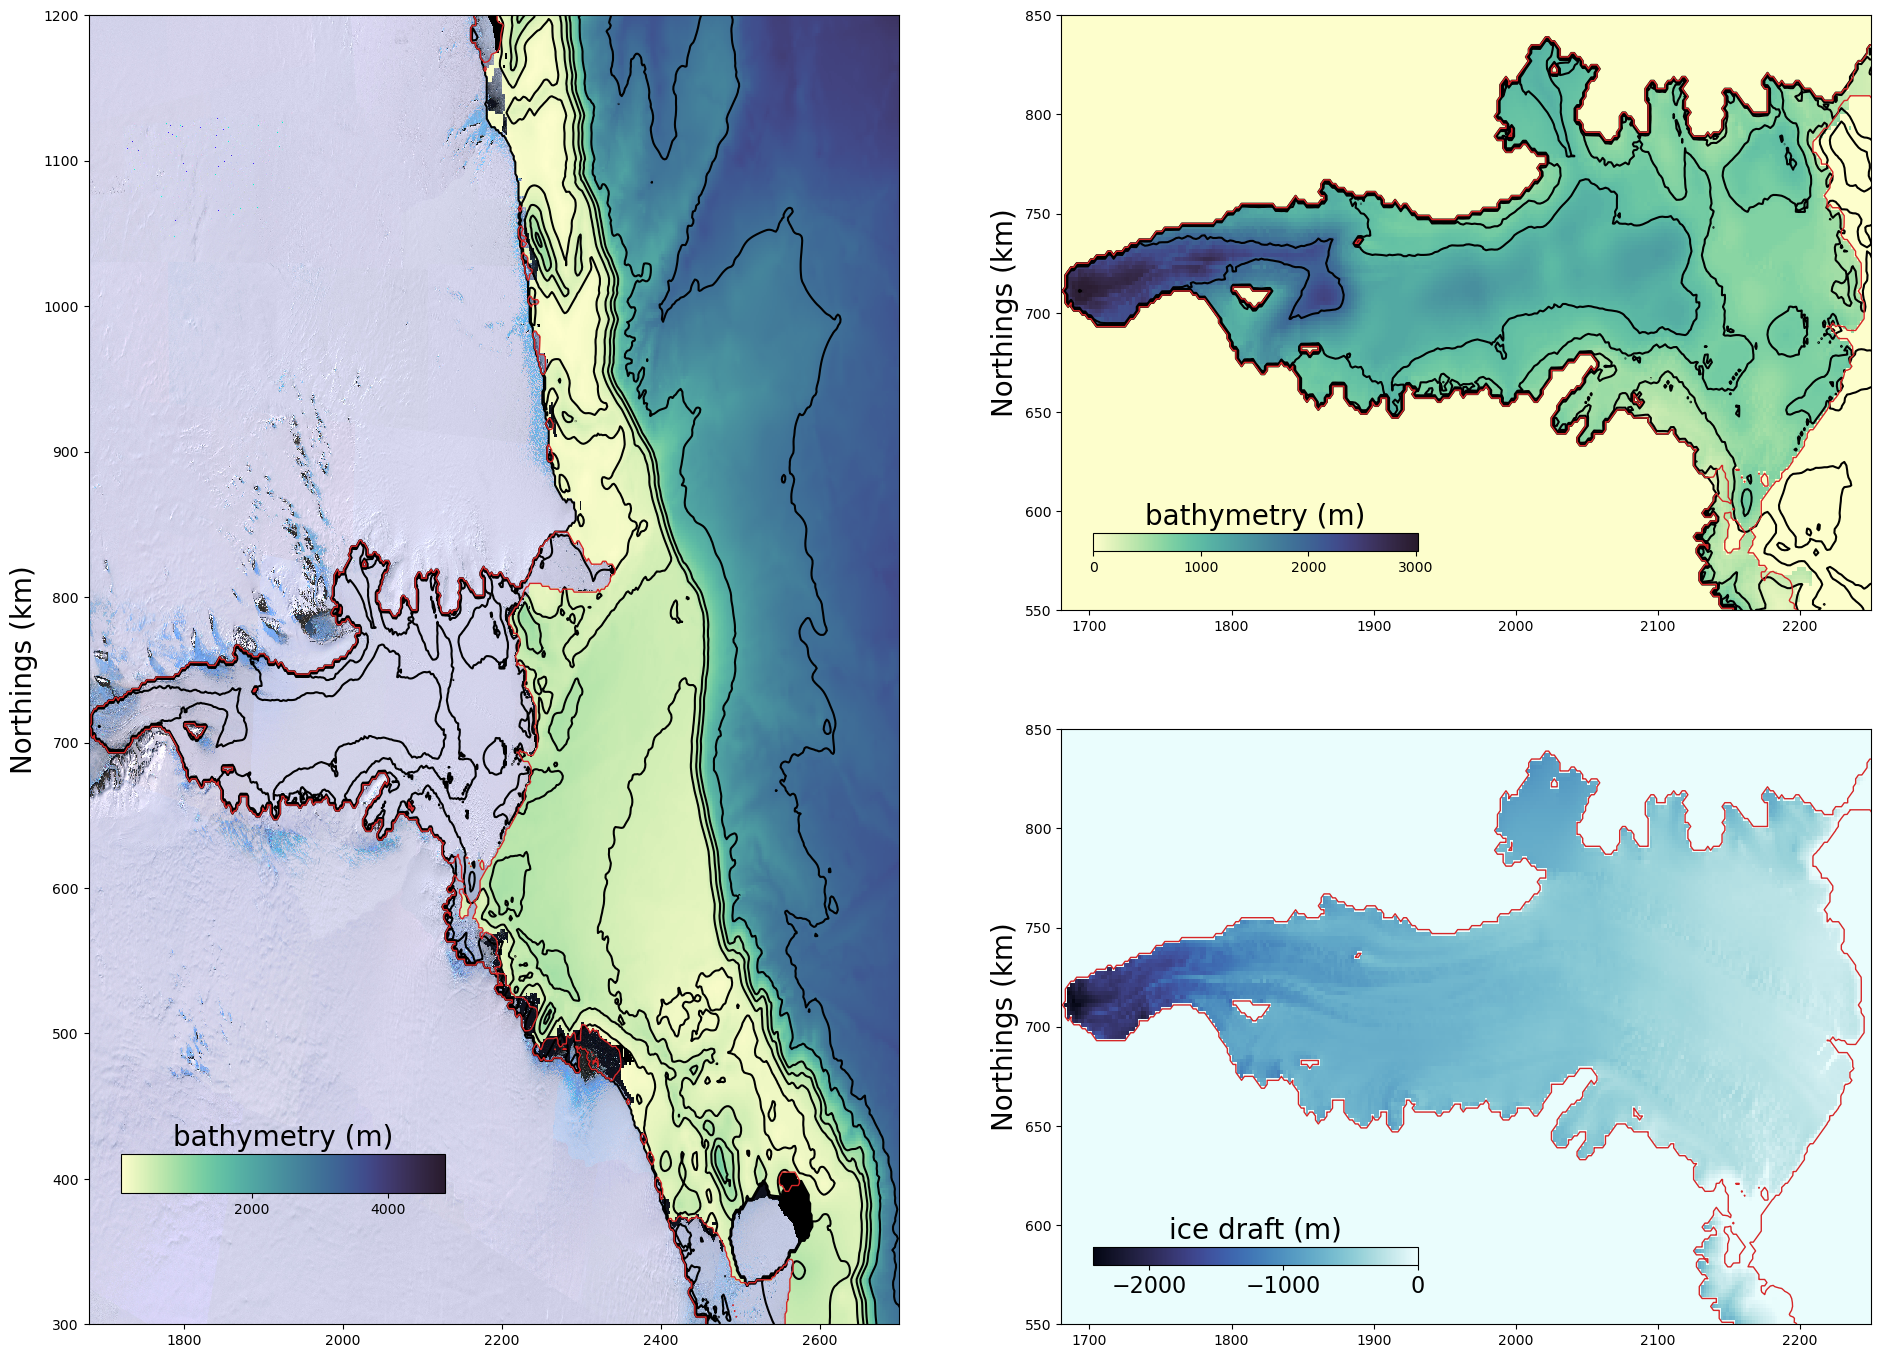

In [19]:
# dpi = 500
# image_save_dpi = 1500

# plt.rcParams['figure.dpi'] = dpi

gs = gridspec.GridSpec(nrows=2,ncols=2,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[23,17])
ax = None

ax=fig.add_subplot(gs[0:,0])
(lima.astype('uint8')).plot.imshow()
# im1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.balance',vmin=-10,vmax=10,add_colorbar=False)
# (ds.mask_rho*(ds.mask_zice==0)*sigma_0_55_67).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.dense',vmin=27.7,vmax=28.1)
# im2 = (ds.mask_rho*(ds.mask_openoceanNaN)*ds.salt.isel(s_rho=0).isel(ocean_time=slice(270,330)).mean(dim='ocean_time')).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.haline',vmin=34.4,vmax=34.9,add_colorbar=False)
im1 = (ds.mask_rho*(ds.mask_openoceanNaN)*ds.h).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.deep',add_colorbar=False)
# co1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(np.arange(-10,10,5)),colors='k',linewidths=1)
# co2 = (ds.h*ds.mask_rho*(ds.mask_zice==0)).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(0,250,500,750,1000,2000,3000),colors='k')
co2 = (ds.h*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(0,250,500,750,1000,2000,3000),colors='k')
co3 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C3',linestyles='-',linewidths=1)

# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((1.68e6,2.7e6))
ax.set_ylim((.3e6,1.2e6))
ax.set_ylabel('Northings (km)',fontsize=20)
ax.set_xlabel('Eastings (km)',fontsize=20)
ax.set_xlabel('')
# ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
# ax.set_xticklabels([])
ax.set_title('')


cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.1, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal',) 
cax.set_title(r'bathymetry (m)',fontsize=20)





## Next plot, AIS bathy


ax=fig.add_subplot(gs[0,1])
(lima.astype('uint8')).plot.imshow()
# im1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.balance',vmin=-10,vmax=10,add_colorbar=False)
# (ds.mask_rho*(ds.mask_zice==0)*sigma_0_55_67).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.dense',vmin=27.7,vmax=28.1)
# im2 = (ds.mask_rho*(ds.mask_openoceanNaN)*ds.salt.isel(s_rho=0).isel(ocean_time=slice(270,330)).mean(dim='ocean_time')).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.haline',vmin=34.4,vmax=34.9,add_colorbar=False)
im1 = (ds.mask_rho*(ds.mask_zice==1)*ds.h).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.deep',add_colorbar=False)
# co1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(np.arange(-10,10,5)),colors='k',linewidths=1)
# co2 = (ds.h*ds.mask_rho*(ds.mask_zice==0)).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(0,250,500,750,1000,2000,3000),colors='k')
co2 = (ds.h*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(0,250,500,750,1000,2000,3000),colors='k')
co3 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C3',linestyles='-',linewidths=1)

# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((1.68e6,2.25e6))
ax.set_ylim((.55e6,.85e6))
ax.set_ylabel('Northings (km)',fontsize=20)
ax.set_xlabel('Eastings (km)',fontsize=20)
ax.set_xlabel('')
# ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
# ax.set_xticklabels([])
ax.set_title('')


cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.1, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal',) 
cax.set_title(r'bathymetry (m)',fontsize=20)





## Next plot, AIS zice


ax=fig.add_subplot(gs[1,1])
(lima.astype('uint8')).plot.imshow()
# im1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.balance',vmin=-10,vmax=10,add_colorbar=False)
# (ds.mask_rho*(ds.mask_zice==0)*sigma_0_55_67).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.dense',vmin=27.7,vmax=28.1)
# im2 = (ds.mask_rho*(ds.mask_openoceanNaN)*ds.salt.isel(s_rho=0).isel(ocean_time=slice(270,330)).mean(dim='ocean_time')).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.haline',vmin=34.4,vmax=34.9,add_colorbar=False)
im1 = (ds.mask_rho*(ds.mask_zice==1)*ds.zice).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.ice',add_colorbar=False)
# co1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(np.arange(-10,10,5)),colors='k',linewidths=1)
# co2 = (ds.h*ds.mask_rho*(ds.mask_zice==0)).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(0,250,500,750,1000,2000,3000),colors='k')
co2 = (ds.zice*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(0,250,500,750,1000,2000,3000),colors='k')
co3 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C3',linestyles='-',linewidths=1)

plt.rcParams.update({'font.size': 16})
plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((1.68e6,2.25e6))
ax.set_ylim((.55e6,.85e6))
ax.set_ylabel('Northings (km)',fontsize=20)
ax.set_xlabel('Eastings (km)',fontsize=20)
ax.set_xlabel('')
# ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
# ax.set_xticklabels([])
ax.set_title('')


cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.1, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal',) 
cax.set_title(r'ice draft (m)',fontsize=20)



# cax = inset_axes(ax,
#                 width="40%",  # width = 10% of parent_bbox width
#                 height="3%",  # height : 50%
#                 loc='lower left',
#                 bbox_to_anchor=(.04,.25, 1, 1),
#                 bbox_transform=ax.transAxes,
#                 borderpad=0,
#                 )
# cbar = fig.colorbar(im2, cax=cax, orientation='horizontal') 
# cax.set_title(r'Sep-Dec mean bottom salinity',fontsize=20)


# annotations


# ax.annotate("1a",
#             xy=(2.2e6, 620e3), xycoords='data',
#             xytext=(2.4e6,750e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=-0.3",
#                            facecolor="coral"))


# ax.annotate("1b",
#             xy=(2.205e6, 600e3), xycoords='data',
#             xytext=(2.4e6, 480e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=0.1",
#                            facecolor="coral"))


# ax.annotate("2",
#             xy=(1.80e6, 720e3), xycoords='data',
#             xytext=(1.80e6, 720e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.75))



# ax.annotate("3",
#             xy=(2.25e6, 780e3), xycoords='data',
#             xytext=(2.0e6, 730e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=-0.1",
#                            facecolor="lightsteelblue"))



# ax.annotate("4",
#             xy=(2.255e6, 900e3), xycoords='data',
#             xytext=(2.18e6, 900e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             # connectionstyle="arc3,rad=-0.1",
#                            facecolor="steelblue"))
# ax.annotate("",
#             xy=(2.25e6, 920e3), xycoords='data',
#             xytext=(2.2e6, 920e3), textcoords='data',
#             size=40, va="center", ha="center",
#             arrowprops=dict(arrowstyle="simple",
#                             # connectionstyle="arc3,rad=-0.1",
#                            facecolor="steelblue"))

# ax.annotate("",
#             xy=(2.26e6, 880e3), xycoords='data',
#             xytext=(2.2e6, 880e3), textcoords='data',
#             size=40, va="center", ha="center",
#             arrowprops=dict(arrowstyle="simple",
#                             # connectionstyle="arc3,rad=-0.1",
#                            facecolor="steelblue"))




# ax.annotate("5",
#             xy=(2.35e6, 930e3), xycoords='data',
#             xytext=(2.29e6, 880e3), textcoords='data',
#             size=40, va="center", ha="center",
#             bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
#             arrowprops=dict(arrowstyle="simple",
#                             connectionstyle="arc3,rad=-0.25",
#                             relpos=(0,1),
#                            facecolor="midnightblue"))

In [35]:
ds_his = xr.open_dataset('/g/data/jk72/deg581/apom/frc/amery_v2km_tamura+era_shflux.nc')
shflux = ds_his["shflux"] 
ds_his.close()

In [56]:
shflux.shf_time

<xarray.DataArray 'shf_time' (shf_time: 365)>
array([  1,   2,   3, ..., 363, 364, 365])
Coordinates:
  * shf_time  (shf_time) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
Attributes:
    cycle_length:  365.0
    long_name:     surface heat flux time
    units:         day

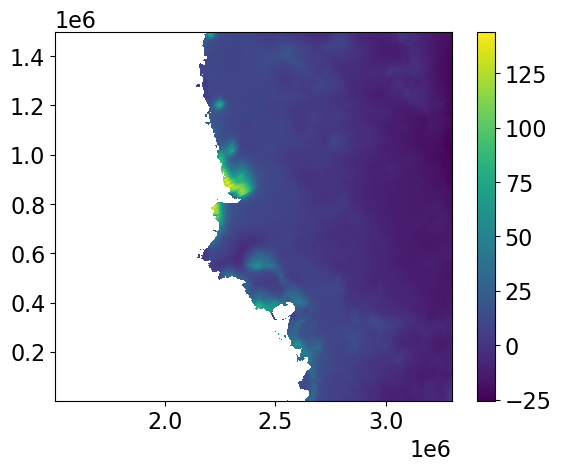

In [59]:
plt.pcolormesh(ds.x_rho,ds.y_rho,-shflux.isel(shf_time=slice(270,330)).mean(dim='shf_time')*ds.mask_openoceanNaN)
plt.colorbar()

<Figure size 640x480 with 0 Axes>

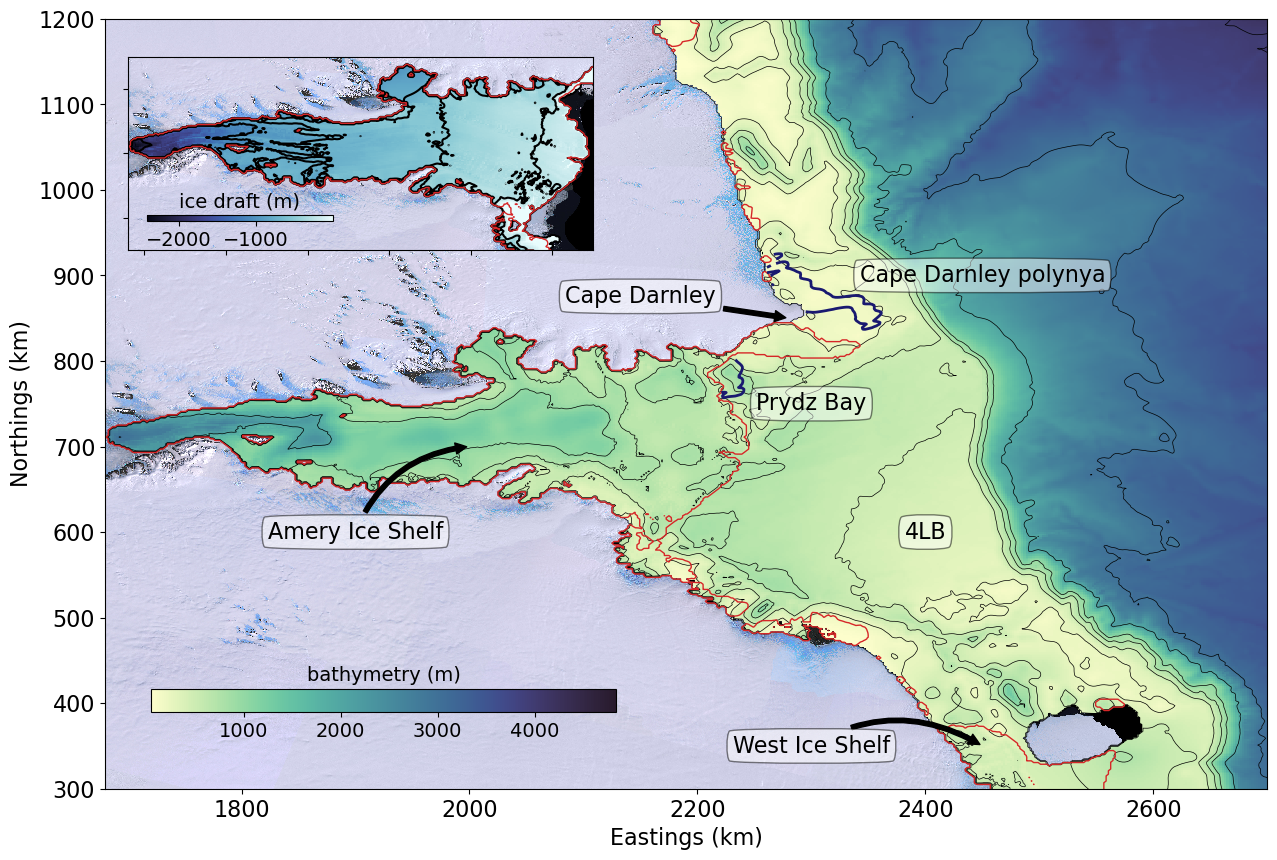

In [65]:
# dpi = 500
# image_save_dpi = 1500

# plt.rcParams['figure.dpi'] = dpi

gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.2, hspace=0.2)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,10])
ax = None

ax=fig.add_subplot(gs[0,0])
(lima.astype('uint8')).plot.imshow()
# im1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.balance',vmin=-10,vmax=10,add_colorbar=False)
# (ds.mask_rho*(ds.mask_zice==0)*sigma_0_55_67).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.dense',vmin=27.7,vmax=28.1)
# im2 = (ds.mask_rho*(ds.mask_openoceanNaN)*ds.salt.isel(s_rho=0).isel(ocean_time=slice(270,330)).mean(dim='ocean_time')).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.haline',vmin=34.4,vmax=34.9,add_colorbar=False)
im1 = (ds.mask_rho*(ds.mask_rhoNaN)*ds.h).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.deep',add_colorbar=False)
# co1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(np.arange(-10,10,5)),colors='k',linewidths=1)
# co2 = (ds.h*ds.mask_rho*(ds.mask_zice==0)).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(0,250,500,750,1000,2000,3000),colors='k')
co2 = (ds.h*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(0,250,500,750,1000,2000,3000,4000,5000),colors='k',linewidths=.5)
co3 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C3',linestyles='-',linewidths=1)



# add shflux contour

co4 = ax.contour(ds.x_rho,ds.y_rho,-shflux.isel(shf_time=slice(270,330)).mean(dim='shf_time')*ds.mask_openoceanNaN,colors='midnightblue',linewidths=2,levels=[110])


# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((1.68e6,2.7e6))
ax.set_ylim((.3e6,1.2e6))
ax.set_ylabel('Northings (km)',fontsize=16)
ax.set_xlabel('Eastings (km)',fontsize=16)
# ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
# ax.set_xticklabels([])
ax.set_title('')




cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.1, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal',) 
cax.set_title(r'bathymetry (m)',fontsize=14)
cbar.ax.tick_params(labelsize=14)







ax.annotate("Prydz Bay",
            xy=(2.3e6, 750e3), xycoords='data',
            xytext=(2.30e6, 750e3), textcoords='data',
            bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
            size=16, va="center", ha="center")


ax.annotate("4LB",
            xy=(2.40e6, 600e3), xycoords='data',
            xytext=(2.40e6, 600e3), textcoords='data',
            bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
            size=16, va="center", ha="center")


ax.annotate("Cape Darnley",
            xy=(2.28e6, 850e3), xycoords='data',
            xytext=(2.15e6, 875.5e3), textcoords='data',
            bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
            size=16, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            # connectionstyle="arc3,rad=-0.1",
                           facecolor="black"))


ax.annotate("Cape Darnley polynya",
            xy=(2.30e6, 850e3), xycoords='data',
            xytext=(2.450e6, 900e3), textcoords='data',
            size=16, va="center", ha="center",
            bbox=dict(boxstyle="round4", fc="w", alpha=0.5))


ax.annotate("Amery Ice Shelf",
            xy=(2.0e6, 700e3), xycoords='data',
            xytext=(1.9e6,600e3), textcoords='data',
            size=16, va="center", ha="center",
            bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.3",
                           facecolor="black"))


ax.annotate("West Ice Shelf",
            xy=(2.45e6, 350e3), xycoords='data',
            xytext=(2.3e6,350e3), textcoords='data',
            size=16, va="center", ha="center",
            bbox=dict(boxstyle="round4", fc="w", alpha=0.5),
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.3",
                           facecolor="black"))




## Next plot, AIS bathy




ax=inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="25%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.02,.7, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )


(lima.astype('uint8')).plot.imshow()
# im1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.balance',vmin=-10,vmax=10,add_colorbar=False)
# (ds.mask_rho*(ds.mask_zice==0)*sigma_0_55_67).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.dense',vmin=27.7,vmax=28.1)
# im2 = (ds.mask_rho*(ds.mask_openoceanNaN)*ds.salt.isel(s_rho=0).isel(ocean_time=slice(270,330)).mean(dim='ocean_time')).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.haline',vmin=34.4,vmax=34.9,add_colorbar=False)
im1 = (ds.mask_rho*(ds.mask_ziceNaN)*ds.zice).plot(ax=ax,x='x_rho',y='y_rho',cmap='cmo.ice',add_colorbar=False)
# co1 = (ds_dailyclima.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).mean(dim='dayofyear').plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(np.arange(-10,10,5)),colors='k',linewidths=1)
# co2 = (ds.h*ds.mask_rho*(ds.mask_zice==0)).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(0,250,500,750,1000,2000,3000),colors='k')
co2 = (-ds.zice*ds.mask_rho).plot.contour(ax=ax,x='x_rho',y='y_rho',levels=(0,250,500,750,1000,2000,3000),colors='k')
co3 = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=(-1,0),colors='C3',linestyles='-',linewidths=1)

# plt.rcParams.update({'font.size': 16})
# plt.rcParams['xtick.labelsize']=16

# ax.text(0.01, 0.99, 'a  mean melt', transform=ax.transAxes,fontsize=14, fontweight='bold', va='top')
ax.set_xlim((1.68e6,2.25e6))
ax.set_ylim((.55e6,.85e6))
# ax.set_ylabel('Northings (km)',fontsize=20)
# ax.set_xlabel('Eastings (km)',fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('')
# ax.grid()
scale_ticks = 1e3
ticks_x = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = mticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_ticks))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('')


cax = inset_axes(ax,
                width="40%",  # width = 10% of parent_bbox width
                height="3%",  # height : 50%
                loc='lower left',
                bbox_to_anchor=(.04,.15, 1, 1),
                bbox_transform=ax.transAxes,
                borderpad=0,
                )
cbar = fig.colorbar(im1, cax=cax, orientation='horizontal',) 
cax.set_title(r'ice draft (m)',fontsize=14)
cbar.ax.tick_params(labelsize=14)

